This jupyter notebook is part of the supplementary material for the book "Materials Data Science" (Stefan Sandfeld, Springer, 2024, DOI 10.1007/978-3-031-46565-9). For further details please refer to the accompanying webpage https://mds-book.org.

## 5.2 Probabilities
### 5.2.2 Two Python Examples
#### Example 1: 

Drawing random integer numbers from the set of numbers 1 ... 6 with replacement and with equal likelihood can be done by creating a "random number generator" object or using the legacy `numpy` function, as shown below.

New version using RNG:

In [6]:
import numpy as np

# create and initialize random number generator
rng = np.random.default_rng()

In [9]:
# number of samples
N = 10

# create N random integer numbers in the range of [1,...,6]
values = rng.integers(1, 6, endpoint=True, size=N)
print("values: ", values)

values:  [1 4 3 2 6 6 6 5 3 2]


This is the version mainly used in the book. However, the legacy `numpy` function is still very commonly -- one of the reasons is that it is 1 line shorter, the other being that it is difficult to get away from old habits... Here is the legacy version:

In [10]:
import numpy as np

In [11]:
# number of samples
N = 10

# create N random integer numbers in the range of [1,...,6]
values = np.random.randint(1, 6, size=N)
print("values: ", values)

values:  [1 1 1 4 2 2 1 4 3 1]


#### Example 2:
To demonstrate how the number of repetitions of an experiment influences the accuracy compared to the behavior that is expected on average, we perform another numerical experiment. We roll a fair die multiple times and record the change of the average value for every additional throw as function of the number of rolls (note that the current average value is the sum of all so far recorded values divided by the current number of rolls).

In [12]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(None)  # for reproducible results add a seed value other than "None"
n_samples = 50
values = rng.integers(1, 6, endpoint=True, size=n_samples)

In [13]:
sample = np.arange(1, n_samples + 1)
averages = values.cumsum() / sample

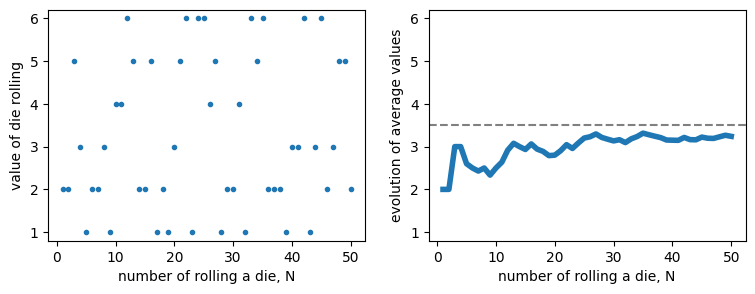

In [20]:
fig, ax = plt.subplots(ncols=2, figsize=(9, 3))
ax[0].plot(sample, values, '.')
ax[0].set(xlabel='number of rolling a die, N', ylabel='value of die rolling', ylim=(0.8, 6.2))
ax[1].plot(sample, averages, '-', lw=4)
ax[1].axhline(3.5, linestyle='--', c='0.5', lw=1.5)
ax[1].set(xlabel='number of rolling a die, N', ylabel='evolution of average values', ylim=(0.8, 6.2))
print()